| | |
|:----------|:----------|
| Name      | Bayesian Modeling Version 1|
| Notebook  | Metropolis Sampler for Normal Model|
| Author    | Joshuah Touyz, PhD |
| Version   | 0.2 |
|Last update| 11/10/20 |

In [1]:
import pandas as pd
import numpy as np
import plotnine as pn

In [2]:
# Utility functions
rnorm = lambda m,v : np.random.normal(m,v,1)
runif = lambda : np.random.uniform(0,1,1)
log_alpha = lambda mu_star, mu_t: -((mu_post - mu_star)**2 - (mu_post - mu_t)**2)/(2*v_post)

# Constants
mu_post = 4.2
v_post = 1.8

# Setting up array
n = 10000
mus = np.zeros(n)

# Initial value
mu_0 = mu_post + rnorm(0,1)
burn_in = 1000

In [3]:
# Setting up the sampler
for i in np.arange(0,n):
    # First iteration
    if i == 0:
        mu_t = mu_0

    # Proposal
    mu_star = rnorm(mu_t,1) # or mu_t + rnorm(0,1)

    # Acceptance criteria
    acceptance_criteria = log_alpha(mu_star, mu_t)

    # Accept/rejection
    if acceptance_criteria > 0:
        mu_t = mu_star
    else:
        log_u = np.log(runif())
        if log_u <= acceptance_criteria:
            mu_t = mu_star
        else:
            pass
    
    mus[i,] = mu_t

In [4]:
mus = pd.DataFrame(mus)
mus.columns = ['mus']

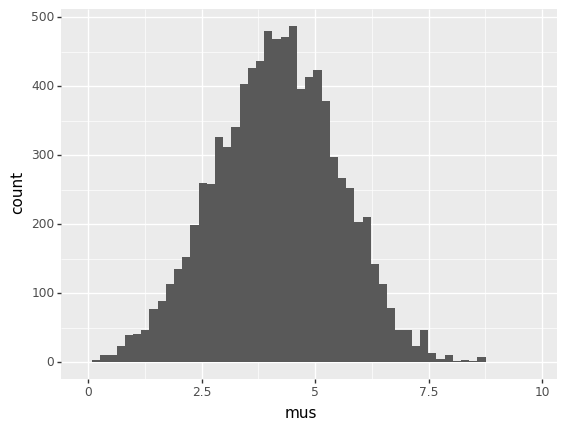

<ggplot: (326873769)>


In [5]:
plot_out = pn.ggplot(pn.aes( x = 'mus'), data = mus[burn_in:]) + pn.geom_histogram()
print(plot_out)

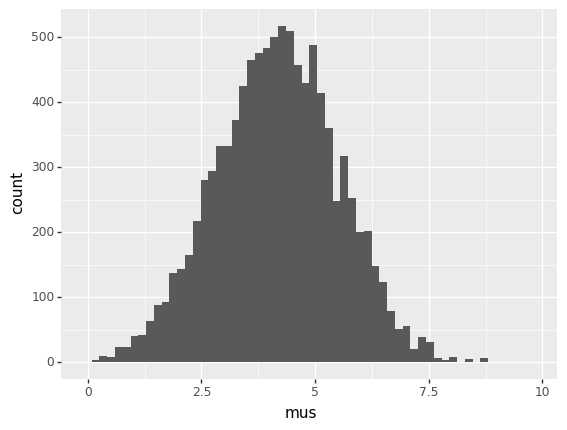

<ggplot: (-9223372036528484408)>


In [6]:
plot_out = pn.ggplot(pn.aes( x = 'mus'), data = mus) + pn.geom_histogram()
print(plot_out)